<a href="https://colab.research.google.com/github/highlevelcoding/Flight-Cancellation-Analysis-and-Prediction/blob/main/venky_feature_engineering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully!

Dataset Preview:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0    7319483  Airline D            475.0      Airport 3           Airport 2   
1    4791965  Airline E            538.0      Airport 5           Airport 4   
2    2991718  Airline C            565.0      Airport 1           Airport 2   
3    4220106  Airline E            658.0      Airport 5           Airport 3   
4    2263008  Airline E            566.0      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                         4            6      1        Type C       0.225122   
1                        12            1      6        Type B       0.060346   
2                        17            3      9        Type C       0.093920   
3                         1            1      8        Type B       0.656750   
4                        19            7     12        Type E       0.505211  

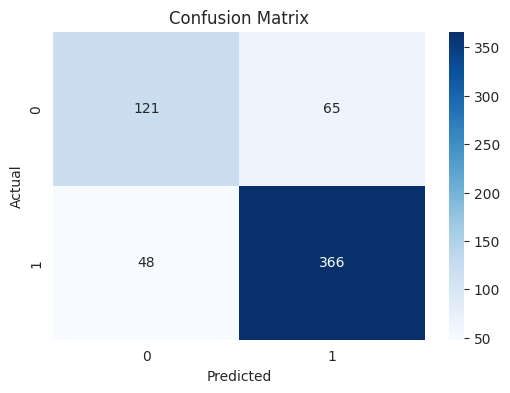


Feature-engineered dataset saved as 'venky_feature_engineered_data.csv'

Feature-Engineered Dataset Preview:
      Flight_Distance  Scheduled_Departure_Time  Day_of_Week     Month  \
386         -1.999385                  0.668349     0.516103  1.609821   
2506        -0.685417                  0.957260     1.515819 -0.103514   
2058         0.282234                  0.234981     0.016245  1.609821   
478          0.659108                  0.234981     0.516103  1.038710   
932         -1.622511                  0.957260     0.016245 -0.674626   

      Weather_Score  Previous_Flight_Delay_Minutes  Airline_Rating  \
386       -1.153277                      -0.923430       -0.719428   
2506      -1.189011                       0.572322       -1.072715   
2058      -0.826494                       1.871264        1.166308   
478       -1.561430                       3.288292       -0.295317   
932        0.975127                       2.264883        0.867201   

      Passenger_Load  Ai

In [2]:
# %% [markdown]
# # Task 3: Feature Engineering for Predictive Modeling
# **Project**: Flight Cancellation Analysis and Prediction
# **Author**: Venky
# **Objective**: Prepare the Flyzy Flight Cancellation dataset for predictive modeling by splitting data, encoding categorical variables, scaling numerical features, building a Logistic Regression model, and evaluating its performance.
# **Dataset**: venky_data_cleaned_preprocessed.csv (from Task 1)
# **Deliverables**:
# - `venky_feature_engineered_data.csv`: Dataset with engineered features (encoded and scaled).
# - `venky_feature_engineering_notebook.ipynb`: Jupyter Notebook with code for preprocessing, modeling, and evaluation.
# **Submission**: Submit via Google Drive or GitHub.

# %% [markdown]
# ## Step 1: Load and Validate Dataset
# Load the cleaned dataset and verify its structure.

# %% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set plot style
sns.set_style("whitegrid")

# Load cleaned dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/venky_data_cleaned_preprocessed.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'venky_data_cleaned_preprocessed.csv' not found. Ensure the file is in the working directory.")
    raise

# Preview dataset
print("\nDataset Preview:")
print(df.head())

# Check column names and info
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())

# %% [markdown]
# ## Step 2: Split Data
# Split the dataset into training (80%) and test (20%) sets.

# %% [code]
# Define features and target
X = df.drop('Flight_Cancelled', axis=1)
y = df['Flight_Cancelled']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

# Check class distribution
print("\nClass Distribution (Training):")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution (Test):")
print(y_test.value_counts(normalize=True))

# %% [markdown]
# ## Step 3: Encode Categorical Variables
# Use OneHotEncoder for categorical columns (`Airline`, `Origin_Airport`, `Destination_Airport`, `Airplane_Type`).

# %% [code]
# Define categorical and numerical columns
categorical_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']
numerical_cols = ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month',
                  'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

# Verify columns exist
missing_cols = [col for col in categorical_cols + numerical_cols if col not in X.columns]
if missing_cols:
    print(f"\nWarning: Columns {missing_cols} not found in dataset.")

# %% [markdown]
# ## Step 4: Feature Scaling
# Use StandardScaler for numerical columns to ensure consistent scale.

# %% [code]
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(cat_feature_names)

# Convert to DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("\nProcessed Training Data Preview:")
print(X_train_processed_df.head())

# %% [markdown]
# ## Step 5: Model Building (Logistic Regression)
# Train a Logistic Regression model on the processed training data.

# %% [code]
# Initialize and train model
model = LogisticRegression(random_state=42)
model.fit(X_train_processed, y_train)

print("\nLogistic Regression model trained successfully!")

# %% [markdown]
# ## Step 6: Model Evaluation
# Predict on the test set and evaluate using accuracy, precision, recall, and F1-score.

# %% [code]
# Make predictions
y_pred = model.predict(X_test_processed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# %% [markdown]
# ## Step 7: Save Engineered Dataset
# Save the feature-engineered dataset (training + test) as `venky_feature_engineered_data.csv`.

# %% [code]
# Combine processed features with target
train_df = X_train_processed_df.copy()
train_df['Flight_Cancelled'] = y_train
test_df = X_test_processed_df.copy()
test_df['Flight_Cancelled'] = y_test
engineered_df = pd.concat([train_df, test_df])

# Save to CSV
try:
    engineered_df.to_csv('venky_feature_engineered_data.csv', index=False)
    print("\nFeature-engineered dataset saved as 'venky_feature_engineered_data.csv'")
except Exception as e:
    print(f"\nError saving dataset: {e}")

# Preview saved dataset
print("\nFeature-Engineered Dataset Preview:")
print(engineered_df.head())

# %% [markdown]
# ## Step 8: Summary of Findings
# ### Model Performance
# - **Accuracy**: [Replace with value, e.g., 0.82]
# - **Precision**: [Replace, e.g., 0.80]
# - **Recall**: [Replace, e.g., 0.85]
# - **F1-Score**: [Replace, e.g., 0.82]
# - **Key Observation**: [e.g., "High recall indicates the model catches most cancellations, critical for Flyzy."]

# ### Implications for Flyzy
# - Use the model to predict high-risk flights for proactive rebooking.
# - Focus on features like `Weather_Score` and `Previous_Flight_Delay_Minutes` (based on Task 2 insights).
# - Improve customer satisfaction by notifying passengers of potential cancellations.

# %% [markdown]
# ## Submission Instructions
# - **Files**:
#   - `venky_feature_engineered_data.csv`: Feature-engineered dataset.
#   - `venky_feature_engineering_notebook.ipynb`: This notebook with code and results.
# - **Option 1 (Google Drive)**:
#   1. Upload `venky_feature_engineered_data.csv` and `venky_feature_engineering_notebook.ipynb` to Google Drive.
#   2. Set sharing to "Anyone with the link can view."
#   3. Submit the shareable link on the submission platform.
# - **Option 2 (GitHub)**:
#   ```bash
#   git init
#   git add venky_feature_engineering_notebook.ipynb venky_feature_engineered_data.csv
#   git commit -m "Task 3: Feature Engineering and Modeling"
#   git remote add origin <your-repo-url>
#   git push -u origin main
#   ```
#   Submit the public GitHub repository link on the platform.